In [8]:
%%html
<img src="https://www.dropbox.com/scl/fi/80h4jwf5rylmrxhtv9n69/Diagrama-WebRTC.png?rlkey=eweuzedjcx2iyz9fkr0i2cgbo&dl=1" width=100%/>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from io import StringIO

In [10]:
Subjective_results_dataset_csv = """
Test Condition (TC),Delay [ms],Jitter [ms],Packet Loss Rate [%],User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20
1,0,0,0,5,4,3,5,3,3,5,5,3,3,3,4,4,4,3,5,3,5,4,4
2,500,0,0,4,3,3,4,3,2,4,5,5,3,1,5,3,5,3,4,3,4,3,5
3,1000,0,0,4,4,3,4,3,3,5,4,5,3,3,5,3,4,3,4,4,4,4,3
4,500,500,0,2,2,3,4,3,3,5,3,4,1,3,4,4,4,4,3,4,4,4,4
5,1000,500,0,3,3,3,4,2,3,4,4,4,3,3,5,4,4,3,3,3,3,3,4
6,0,0,15,3,3,4,3,3,3,4,3,3,2,4,5,3,3,2,4,3,3,3,3
7,500,0,15,3,3,3,3,3,3,3,2,4,2,3,5,3,4,4,2,2,4,3,2
8,1000,0,15,2,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,2,3,4,2
9,500,500,15,1,3,2,3,3,3,3,1,2,2,2,4,2,2,2,3,3,2,3,2
10,1000,500,15,2,3,3,1,3,2,3,3,2,1,2,5,1,3,4,3,1,3,3,2
11,0,0,30,1,3,2,3,3,3,2,2,3,2,2,4,3,3,3,3,2,3,3,2
12,500,0,30,2,2,2,1,2,2,2,1,3,2,2,5,2,3,2,2,1,2,3,2
13,1000,0,30,1,3,2,3,3,2,2,2,3,1,1,5,2,3,2,2,1,2,3,1
14,500,500,30,1,3,1,3,3,3,1,2,2,2,4,2,2,2,1,1,1,2,3,1
15,1000,500,30,1,3,1,1,3,2,2,1,1,1,1,3,1,1,1,1,1,3,3,1
"""

In [11]:
csv_file_like_object = StringIO(Subjective_results_dataset_csv)
data = pd.read_csv(csv_file_like_object)

In [12]:
data.head()

,Test Condition (TC),Delay [ms],Jitter [ms],Packet Loss Rate [%],User1,User2,User3,User4,User5,User6,...,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20
0,1,0,0,0,5,4,3,5,3,3,...,3,4,4,4,3,5,3,5,4,4
1,2,500,0,0,4,3,3,4,3,2,...,1,5,3,5,3,4,3,4,3,5
2,3,1000,0,0,4,4,3,4,3,3,...,3,5,3,4,3,4,4,4,4,3
3,4,500,500,0,2,2,3,4,3,3,...,3,4,4,4,4,3,4,4,4,4
4,5,1000,500,0,3,3,3,4,2,3,...,3,5,4,4,3,3,3,3,3,4


In [13]:
data.columns

Index(['Test Condition (TC)', 'Delay [ms]', 'Jitter [ms]',
       'Packet Loss Rate [%]', 'User1', 'User2', 'User3', 'User4', 'User5',
       'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User12',
       'User13', 'User14', 'User15', 'User16', 'User17', 'User18', 'User19',
       'User20'],
      dtype='object')

In [14]:
data.describe()

,Test Condition (TC),Delay [ms],Jitter [ms],Packet Loss Rate [%],User1,User2,User3,User4,User5,User6,...,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,600.000000,200.000000,15.000000,2.333333,2.866667,2.533333,3.000000,2.866667,2.666667,...,2.466667,4.266667,2.666667,3.200000,2.666667,2.866667,2.266667,3.133333,3.266667,2.533333
std,4.472136,387.298335,253.546276,12.677314,1.290994,0.743223,0.833809,1.195229,0.351866,0.487950,...,0.990430,0.961150,0.975900,1.014185,0.975900,1.125463,1.099784,0.915475,0.457738,1.245946
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000
25%,4.500000,500.000000,0.000000,0.000000,1.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.500000,3.000000,2.000000
50%,8.000000,500.000000,0.000000,15.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000
75%,11.500000,1000.000000,500.000000,30.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,4.000000,3.000000,3.500000,3.000000,4.000000,3.500000,3.500000
max,15.000000,1000.000000,500.000000,30.000000,5.000000,4.000000,4.000000,5.000000,3.000000,3.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000


## Correlation analysis

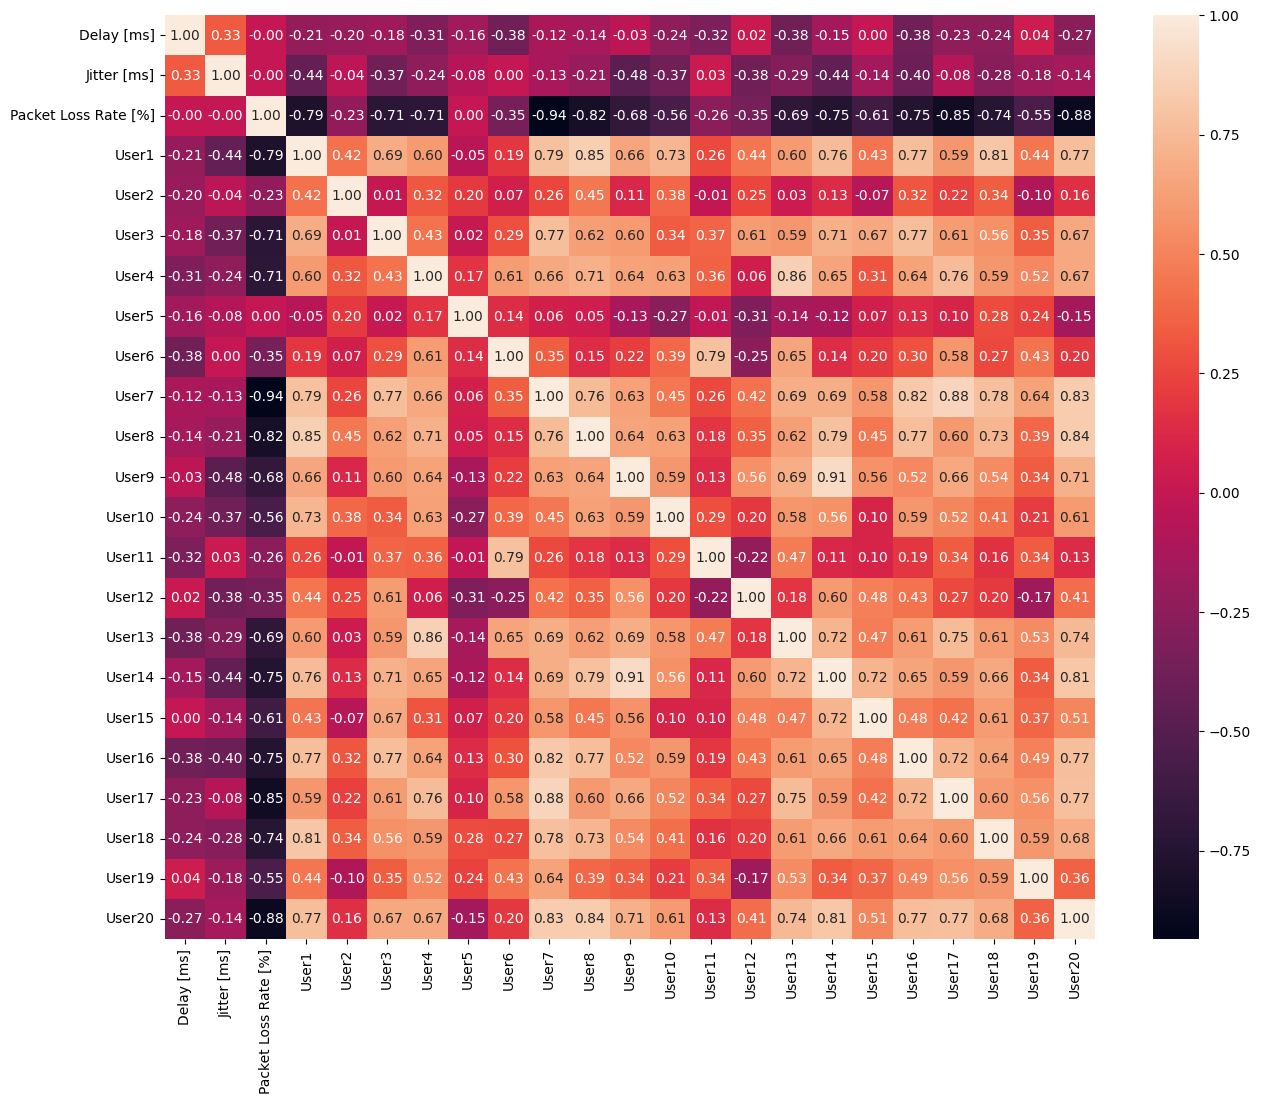

In [15]:
corr_matrix = data.iloc[:,1:].corr()  #discard test case column

# Heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

#### heatmap between the 3 factors and mean of all users satisfaction

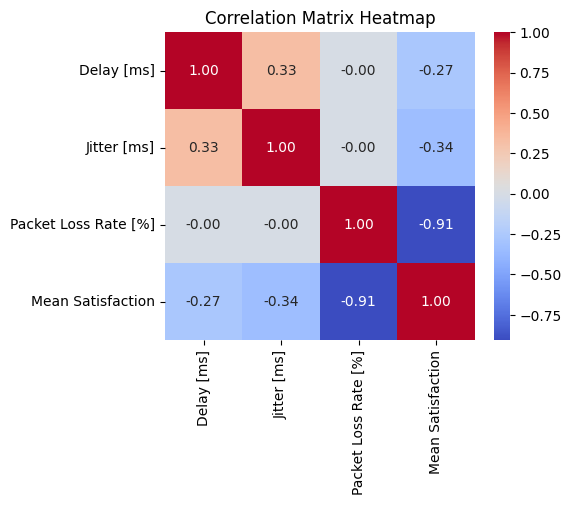

In [16]:
user_columns = [col for col in data.columns if 'User' in col]
data['Mean Satisfaction'] = data[user_columns].mean(axis=1)

columns_of_interest = ['Delay [ms]', 'Jitter [ms]', 'Packet Loss Rate [%]', 'Mean Satisfaction']
correlation_matrix = data[columns_of_interest].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Satisfaction Distribution

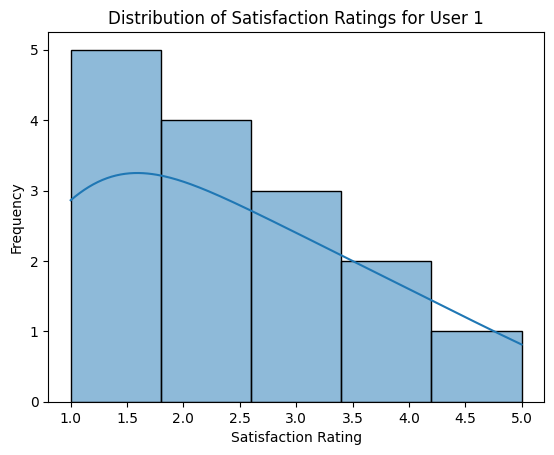

In [17]:
sns.histplot(data['User1'], kde=True)
plt.title('Distribution of Satisfaction Ratings for User 1')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

### Satisfaction Over Different Test Conditions

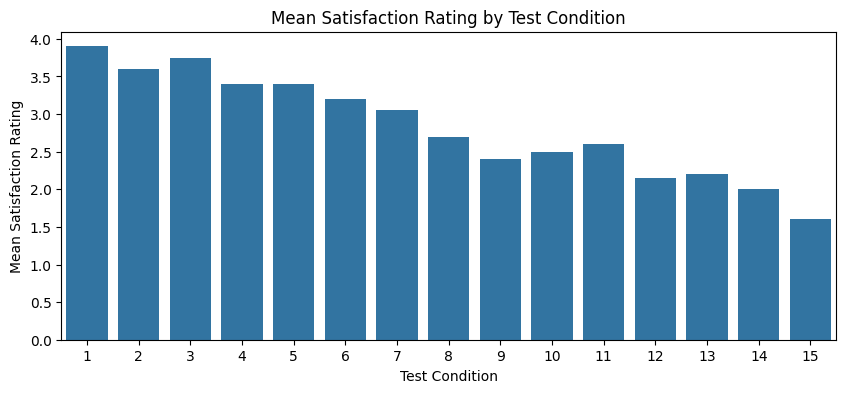

In [18]:
mean_satisfaction = data.iloc[:, 4:].mean(axis=1)
plt.figure(figsize=(10, 4))
sns.barplot(x=data['Test Condition (TC)'], y=mean_satisfaction)
plt.title('Mean Satisfaction Rating by Test Condition')
plt.xlabel('Test Condition')
plt.ylabel('Mean Satisfaction Rating')
plt.show()

In [19]:
data.columns

Index(['Test Condition (TC)', 'Delay [ms]', 'Jitter [ms]',
       'Packet Loss Rate [%]', 'User1', 'User2', 'User3', 'User4', 'User5',
       'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User12',
       'User13', 'User14', 'User15', 'User16', 'User17', 'User18', 'User19',
       'User20', 'Mean Satisfaction'],
      dtype='object')

In [20]:
user_columns = [col for col in data.columns if 'User' in col]
data['Mean Satisfaction'] = data[user_columns].mean(axis=1)

print(data[['Test Condition (TC)', 'Mean Satisfaction']])

    Test Condition (TC)  Mean Satisfaction
0                     1               3.90
1                     2               3.60
2                     3               3.75
3                     4               3.40
4                     5               3.40
5                     6               3.20
6                     7               3.05
7                     8               2.70
8                     9               2.40
9                    10               2.50
10                   11               2.60
11                   12               2.15
12                   13               2.20
13                   14               2.00
14                   15               1.60


### Satisfaction, collapsing for each factor

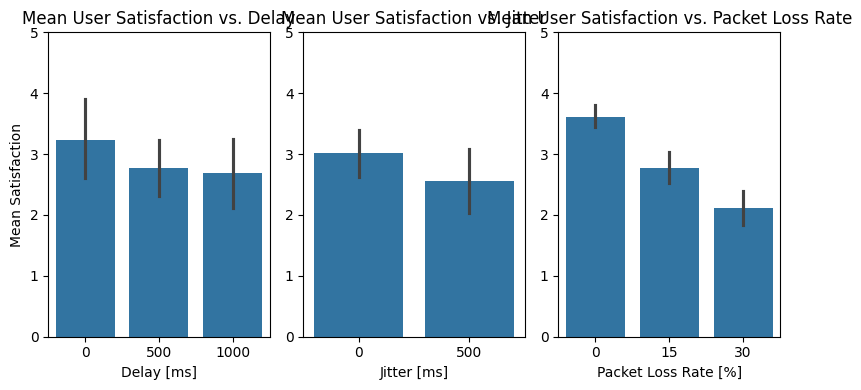

In [21]:
plt.figure(figsize=(8, 4))

# Plot for Delay
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(x='Delay [ms]', y='Mean Satisfaction', data=data)
plt.title('Mean User Satisfaction vs. Delay')
plt.xlabel('Delay [ms]')
plt.ylabel('Mean Satisfaction')
plt.ylim(0, 5)

# Plot for Jitter
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(x='Jitter [ms]', y='Mean Satisfaction', data=data)
plt.title('Mean User Satisfaction vs. Jitter')
plt.xlabel('Jitter [ms]')
plt.ylabel('')
plt.ylim(0, 5)

# Plot for Packet Loss Rate
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(x='Packet Loss Rate [%]', y='Mean Satisfaction', data=data)
plt.title('Mean User Satisfaction vs. Packet Loss Rate')
plt.xlabel('Packet Loss Rate [%]')
plt.ylabel('')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

### Satisfaction, restricting to one factor, but taking the cases where others factors are neutral

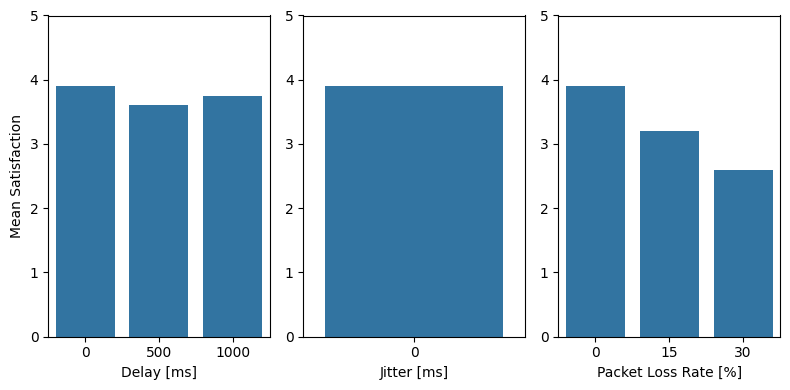

In [22]:
plt.figure(figsize=(8, 4))

# Filter data for each cause where the other causes are 0
# Delay
delay_filtered = data[(data['Jitter [ms]'] == 0) & (data['Packet Loss Rate [%]'] == 0)]
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(x='Delay [ms]', y='Mean Satisfaction', data=delay_filtered)
plt.xlabel('Delay [ms]')
plt.ylabel('Mean Satisfaction')
plt.ylim(0, 5)

# Jitter
jitter_filtered = data[(data['Delay [ms]'] == 0) & (data['Packet Loss Rate [%]'] == 0)]
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(x='Jitter [ms]', y='Mean Satisfaction', data=jitter_filtered)
plt.xlabel('Jitter [ms]')
plt.ylabel('')
plt.ylim(0, 5)

# Packet Loss Rate
packet_loss_filtered = data[(data['Delay [ms]'] == 0) & (data['Jitter [ms]'] == 0)]
plt.subplot(1, 3, 3)
sns.barplot(x='Packet Loss Rate [%]', y='Mean Satisfaction', data=packet_loss_filtered)
plt.xlabel('Packet Loss Rate [%]')
plt.ylabel('')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()